<center><h1 class="background-title">Workshop 6 - Background<br>LDA & QDA</h1></center>

## 	🔮 Supervised Learning Recap: Loss and Risk Functions

In supervised learning problems, we usually assume that there exists some underlying distribution from which we jointly draw pairs of observable values $\boldsymbol{x}$ and hidden values $y$. Our goal is to come up with some prediction function which outputs a prediction $\hat{y}$ based on $x$:

$$
\hat{y}=h\left(\boldsymbol{x}\right)
$$

for which $\hat{y}$ is as close as possible $y$. More specifically, we want $\hat{y}$ to be close to $y$ under some given distance function and in terms of expectation value:

$$
\mathbb{E}\left[L\left(\hat{y},y\right)\right]
$$

We call the distance function $L\left(\hat{y},y\right)$ loss function, and the expectation value of the loss function, as a function of $h$, the risk function:

$$
R\left\{h\right\}=\mathbb{E}\left[L\left(\hat{y}=h\left(x\right),y\right)\right]
$$

So our problem is to find an optimal prediction function $h^*$ which minimizes the risk function:

$$
h^*\left(x\right) = \underset{h}{\arg\min}\ R\left\{h\right\}= \underset{h}{\arg\min}\ \mathbb{E}\left[L\left(h\left(x\right),y\right)\right]
$$

### 📋 Example: The 0-1 Loss (Misclassification Rate)

For classification problems we have already introduced the **misclassification rate** risk function:

$$
R\left\{h\right\}=\mathbb{E}\left[I\left\{h\left(x\right)\neq y\right\}\right]
$$

Which uses a loss function known as the **0-1 loss**: $I\left\{\hat{y}\neq y\right\}$. (The loss function returns 0 for success and 1 otherwise)

Given the distribution function $p\left(\boldsymbol{x},y\right)$ the solution to this problem is:

$$
h^*\left(x\right) 
= \underset{h}{\arg\min}\ \mathbb{E}\left[I\left\{h\left(x\right)\neq y\right\}\right]
= \underset{y}{\arg\max}\ p\left(y|x\right)
$$

## 🧰 Different Approaches for Solving Problems

The problem is that we do not know the distribution $p\left(\boldsymbol{x},y\right)$, which is required for calculating the expectation value inside the risk function. This is of course solved by using the dataset, which is a known set of pairs $\left\{\left(\boldsymbol{x}_i, y_i\right)\right\}$.

In practice, there is more than one way to do so, and we can roughly divide the different methods into 3 approaches, differing by the quantity which we are trying to estimate by using dataset.

### Approach 1: Estimating $P\left(\boldsymbol{x},y\right)$

Under this approach, we will use the dataset to try and approximate the full joint distribution $p\left(\boldsymbol{x}_i, y_i\right)$. We can do so using the distribution estimation tools we have learned earlier in this course. We can then use the full distribution to solve:

$$
h^*\left(x\right) = \underset{h}{\arg\min}\ \mathbb{E}\left[L\left(h\left(x\right),y\right)\right]
$$

In many cases, it will be simpler to estimate $P\left(\boldsymbol{x}_i,y_i\right)$ as $P\left(\boldsymbol{x}_i|y_i\right)P\left(y_i\right)$ and estimate each of the two distribution individually. 

### Approach 2: Estimating $P\left(y|\boldsymbol{x}\right)$

We can use the law of total expectation (משפט ההחלקה) to write the risk as:

$$
R\left\{h\right\}
=\mathbb{E}\left[L\left(h\left(x\right),y\right)\right]
=\mathbb{E}\left[\mathbb{E}\left[L\left(h\left(x\right),y\right)\right|x]\right]
$$

Therefore we can solve the problem for each $x$ independently:

$$
h^*\left(x\right) = \underset{h\left(x\right)}{\arg\min}\ \mathbb{E}\left[L\left(h\left(x\right),y\right)|x\right]
$$

Unlike in the original equation for the risk, here we freeze $x$ and the expectation is done only over $y$ using the conditional distribution $p\left(y|\boldsymbol{x}\right)$.

Under this approach, we will use the dataset to try and approximate the conditional distribution $p\left(y|\boldsymbol{x}\right)$ using the distribution estimation tools we learn earlier in this course.

### Approach 3: Estimating the Expectation Value Directly

As we saw earlier in the course, we can approximate an expectation value  $\mathbb{E}\left[f\left(x\right)\right]$ by using the empirical mean $\frac{1}{N}\sum_i f\left(x_i\right)$.

Under this approach, we will use the dataset to directly search for the optimal $h^*$ minimizing the empirical risk:

$$
h^*\left(x\right) = \underset{h}{\arg\min}\ \frac{1}{N}\sum_i L\left(h\left(x_i\right),y_i\right)
$$

### Generative vs. Discriminative

The first approach is usually referred to as a generative approach since we completely learn how the data is generated. The other two approaches are usually referred to as discriminative approaches since they directly try to find the optimal prediction function, which is usually also referred to as the discrimination function.

In this workshop, we will look at some methods which take the generative approach.

## 🌗 Linear Discriminant Analysis (LDA)

LDA solves a classification problem with a misclassification rate risk. Here we will only talk about the case of binary classification (with only two classes: $0$ and $1$), but this could easily be extended to any number of classes.

### Assumption

For each class $j \in \left\{0,1\right\}$, we assume that $p\left(\boldsymbol{x}|y=j\right)$ has a multivariate normal distribution with some mean value $\boldsymbol{\mu}_j$ and a covariance matrix $\Sigma$. Note that $\Sigma$ has no index $j$ and is assumed to be the same for both classes.

### Steps

We will denote by $N_j$ the number of $y_i$ in the dataset which are equal to $j$: $N_j=\sum_i I\left\{y_i=j\right\}$.

We will start by estimating the distributions $p\left(y\right)$ and $p\left(\boldsymbol{x}|y\right)$:

1. estimate $p\left(y\right)$ from the dataset as:

$$
p\left(y=j\right) = \frac{N_j}{N}
$$

2. For each $j$ estimate the mean of $p\left(\boldsymbol{x}|y=j\right)$ as:

$$
\boldsymbol{\mu}_j = \frac{1}{N_j}\sum_{i\ \text{s.t.}\ y_i=j}\boldsymbol{x}_i
$$

3. Estimate the covariance matrix as:

$$
\Sigma = \frac{1}{N}\sum_{i}\left(\boldsymbol{x}_i-\boldsymbol{\mu}_{y_i}\right)\left(\boldsymbol{x}_i-\boldsymbol{\mu}_{y_i}\right)^T
$$

It can then be shown that:

$$
\begin{align*}
h^*\left(x\right) 
& = \underset{y}{\arg\max}\ p\left(y|x\right) \\
& = \underset{y}{\arg\max}\ p\left(x|y\right)p\left(y\right) \\
& = \underset{y}{\arg\min}\ \tfrac{1}{2}\left(\boldsymbol{\mu}_y-\boldsymbol{x}\right)^T\Sigma^{-1}\left(\boldsymbol{\mu}_y-\boldsymbol{x}\right) - \log\left(p\left(y\right)\right) \\
& =
\begin{cases}
1\qquad \boldsymbol{a}^T \boldsymbol{x} + b > 0 \\
0\qquad \text{otherwise}\\
\end{cases}
\end{align*}
$$

Where:
- $\boldsymbol{a}=\Sigma^{-1}\left(\boldsymbol{\mu}_1-\boldsymbol{\mu}_0\right)$
- $b=\tfrac{1}{2}\left(\boldsymbol{\mu}_0^T\Sigma^{-1}\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1^T\Sigma^{-1}\boldsymbol{\mu}_1\right) + \log\left(\frac{p\left(y=1\right)}{p\left(y=0\right)}\right)$

The resulting linear decision rule $\boldsymbol{a}^T \boldsymbol{x} + b > 0$ gives this algorithm its name.

## 🌖 Quadric Discriminant Analysis (QDA)

QDA is similar to LDA except for the the fact that we no longer assume that the covariance matrix $\Sigma$ is the same for all classes. The difference in the algorithm is that in the third step we independently estimate a covariance matrix for each of the class:

$$
\Sigma_j = \frac{1}{N_j}\sum_{i\ \text{s.t.}\ y_i=j}\left(\boldsymbol{x}_i-\boldsymbol{\mu}_j\right)\left(\boldsymbol{x}_i-\boldsymbol{\mu}_j\right)^T
$$

The resulting decision function is:

$$
\begin{align*}
h^*\left(x\right) 
& =
\begin{cases}
0\qquad \boldsymbol{x}^T C \boldsymbol{x} + \boldsymbol{a}^T \boldsymbol{x} + b > 0 \\
1\qquad \text{otherwise}\\
\end{cases}
\end{align*}
$$

Where:
- $C=\tfrac{1}{2}\left(\Sigma_0^{-1}-\Sigma_1^{-1}\right)$
- $\boldsymbol{a}=\Sigma_1^{-1}\boldsymbol{\mu}_1-\Sigma_0^{-1}\boldsymbol{\mu}_0$
- $b=\tfrac{1}{2}\left(\boldsymbol{\mu}_1^T\Sigma_1^{-1}\boldsymbol{\mu}_1 - \boldsymbol{\mu}_0^T\Sigma_0^{-1}\boldsymbol{\mu}_0\right) + \log\left(\frac{\left|\Sigma_0\right|^{1/2}p\left(y=1\right)}{\left|\Sigma_1\right|^{1/2}p\left(y=0\right)}\right)$

The resulting quadric decision rule gives this algorithm its name.

<center><h1 class="workshop-title">Workshop 06<br>LDA & QDA</h1></center>

## 🦠 Dataset: Breast Cancer Wisconsin

We will return to the same dataset of the **Breast Cancer Wisconsin Diagnostic** which can be found [here](https://yairomer.github.io/ml_course/datasets/breast_cancer.csv).

## ❓️ Problem: Predict the Correct Diagnostic

Giving a prediction of whether or not a tissue is malignant (cancerous) or benign (non-cancerous) based on the features extracted from the tissue's microscope image.

## 🔃 The Workflow

<center><img src="../media/diagrams/workflow/workflow_clustering.png" width="300px" style="width:300px"/></center>

## 🛠️ Preparations

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 90  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## 🕵️ Data Inspection

In [ ]:
data_file = 'https://yairomer.github.io/ml_course/datasets/breast_cancer.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print_math('Number of rows in the dataset: $N={}$'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## The Data Fields and Types

Again we will only work with the diagnosis and the first two features:

- **diagnosis** - The correct diagnosis: M = malignant (cancerous), B = benign (non-cancerous)
- **radius_mean** - The average radius of the cells in the sample.
- **texture_mean** - The average standard deviation of gray-scale values of the cells in the sample.

The distribution of the two features:

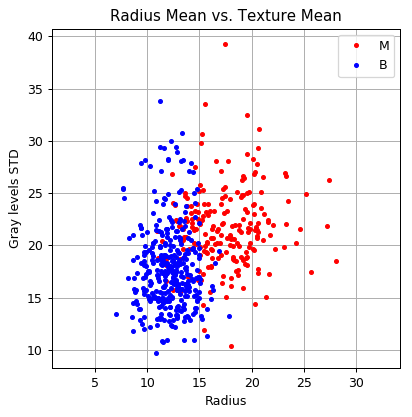

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
ax.axis('equal')

ax.plot(dataset.query('diagnosis == "M"')['radius_mean'].values, 
        dataset.query('diagnosis == "M"')['texture_mean'].values,
        '.r', label='M')
ax.plot(dataset.query('diagnosis == "B"')['radius_mean'].values, 
        dataset.query('diagnosis == "B"')['texture_mean'].values,
        '.b', label='B')
ax.legend()
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');

## 📜 Problem Definition - Same as before:

### The Underlying System

<center><img width="500px" src="../media/diagrams/breast_cancer_process.png?"/></center>

### The Task and the Goal

A supervised learning problem of binary classification.

Find a discrimination function: a function $h\left(\cdot\right)$, mapping form the space of $\boldsymbol{x}=\left[\text{mean_radius},\text{mean_texture}\right]^T$ to the space of labels $y$

### Evaluation Method: The Misclassification Rate

$$
R\left\{h, \left\{\boldsymbol{x},y\right\}\right\}=\frac{1}{N}\sum_i I\left\{h\left(\boldsymbol{x}_i\right)\neq y_i\right\}
$$

### 📚 Splitting the dataset

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed (this is important to make our result reproducible)
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

train_set = dataset.iloc[train_indices]
test_set = dataset.iloc[test_indices]

## 💡 Model & Learning Method Suggestion 1: LDA

We will use the LDA algorithm to generate our prediction function.

The parameters of the model are:
- The values of the $p\left(y\right)$.
- The means of the two distributions.
- The covariance matrix.

The model has no hyper-parameters.

## ⚙️ Learning

### ✍️ Exercise 6.1

1. Find the optimal classification function using LDA
2. Can you give some confidence level based on the LDA model?
3. How would the algorithm change if you know that the prior chances of a tissue being malignant is 5%?

#### Solution 6.1-1

Implementing the LDA algorithm

In [ ]:
## Define x & y
x = train_set[['radius_mean', 'texture_mean']].values
y = train_set['diagnosis'].values == 'M'

## Calculate p(y)
py1 = np.mean(y)
py0 = 1 - py1

## Calculate the means of the normal distributions
mu0 = x[y==0].mean(axis=0)
mu1 = x[y==1].mean(axis=0)

## Calculate the covariance matrix
x_minus_mu = np.concatenate((x[y==0] - mu0[None, :], x[y==1] - mu1[None, :]), axis=0)
cov_mat = (x_minus_mu.T @ x_minus_mu) / len(x)

## Calculate linear classifier coefficients
cov_mat_inv = np.linalg.inv(cov_mat)
a = cov_mat_inv @ (mu1- mu0)
b = 0.5 * (mu0 @ cov_mat_inv @ mu0 - mu1 @ cov_mat_inv @ mu1) + np.log(py1 / py0)

## Evaluate the risk on the train set
train_prediction = (x @ a + b) > 0
train_risk = (train_prediction != y).mean()

print_math('The train risk is: ${:.2}$'.format(train_risk))

Let us plot the normal distributions and the classifier

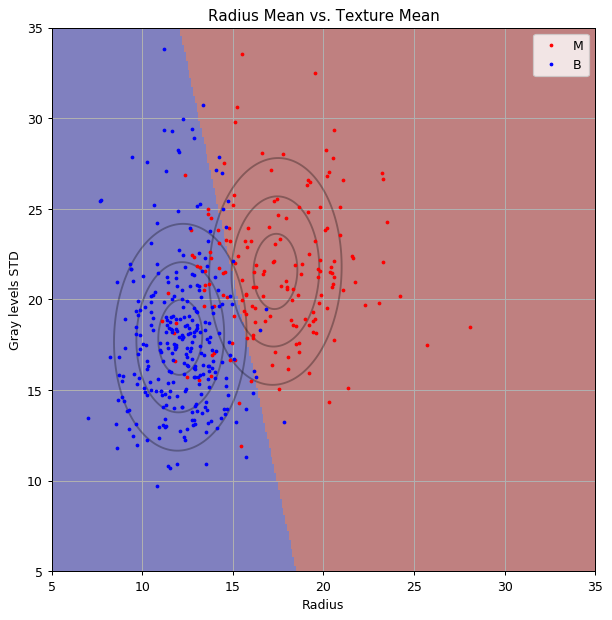

In [ ]:
from scipy.stats import multivariate_normal
x1_grid, x2_grid = np.meshgrid(np.arange(5, 35 + 1e-9, 0.1), np.arange(5, 35 + 1e-9, 0.1))

norm_dist0 = multivariate_normal(mu0, cov_mat)
norm_dist1 = multivariate_normal(mu1, cov_mat)
predict = (a[0] * x1_grid + a[1] * x2_grid + b) > 0

fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(x1_grid, x2_grid, norm_dist0.pdf(np.stack((x1_grid, x2_grid), axis=2)), colors='k', alpha=0.3, levels=(0.005, 0.01, 0.015))
ax.contour(x1_grid, x2_grid, norm_dist1.pdf(np.stack((x1_grid, x2_grid), axis=2)), colors='k', alpha=0.3, levels=(0.005, 0.01, 0.015))
ax.imshow(predict, extent=[x1_grid.min(), x1_grid.max(), x2_grid.max(), x2_grid.min()], cmap='jet', alpha=0.5)
ax.plot(x[y==1, 0], x[y==1, 1],'.r', markersize=4, label='M')
ax.plot(x[y==0, 0], x[y==0, 1],'.b', markersize=4, label='B')
ax.set_xlim(x1_grid.min(), x1_grid.max())
ax.set_ylim(x2_grid.min(), x2_grid.max())
ax.grid(True)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD')
ax.legend();

#### Solution 6.1-2

In the LDA algorithm, and in any other generative algorithm, we are selecting the classifier based on the estimated underlying distribution. Therefore we can actually predict the probability of a tissue being malignant.

We saw that we can write $p\left(y=1|\boldsymbol{x}\right)$ using Bayes rule:

$$
p\left(y=1|\boldsymbol{x}\right)=\frac{p\left(\boldsymbol{x}|y=1\right)p\left(y=1\right)}{p\left(\boldsymbol{x}|y=0\right)p\left(y=0\right)+p\left(\boldsymbol{x}|y=1\right)p\left(y=1\right)}
$$

and since all the above distributions are known we predict the probability of a tissue being malignant given some set of features $\boldsymbol{x}$

#### Solution 6.1-3

If $p\left(y=1\right)$ and $p\left(y=0\right)\left(=1-p\left(y=1\right)\right)$ are known we can simply use these values instead of trying to estimate them. These values appear in the expression for $b$:

$b=\tfrac{1}{2}\left(\boldsymbol{\mu}_0^T\Sigma^{-1}\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1^T\Sigma^{-1}\boldsymbol{\mu}_1\right) + \log\left(\frac{p\left(y=0\right)}{p\left(y=1\right)}\right)$

This is the prediction map based on $p\left(y=1\right)=0.05$ and $p\left(y=0\right)=0.95$:

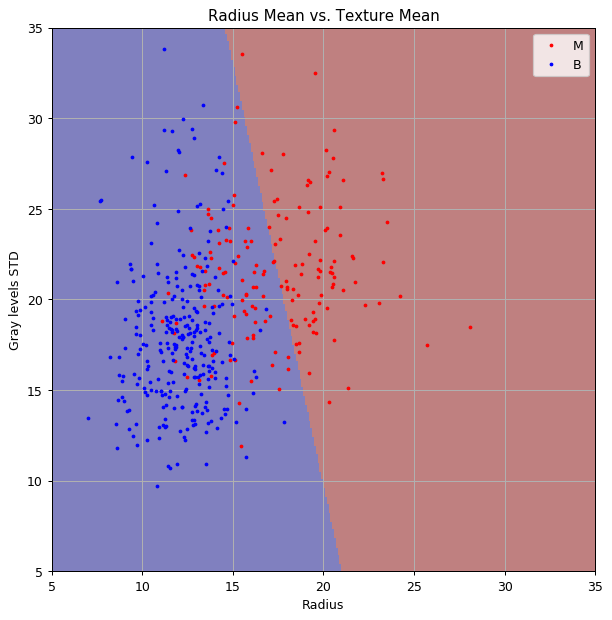

In [ ]:
## Define p(y) according to the known prior
py1 = 0.05
py0 = 0.95

## Calculate linear classifier coefficients
cov_mat_inv = np.linalg.inv(cov_mat)
a = cov_mat_inv @ (mu1- mu0)
b = 0.5 * (mu0 @ cov_mat_inv @ mu0 - mu1 @ cov_mat_inv @ mu1) + np.log(py1 / py0)

predict = (a[0] * x1_grid + a[1] * x2_grid + b) > 0

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(predict, extent=[x1_grid.min(), x1_grid.max(), x2_grid.max(), x2_grid.min()], cmap='jet', alpha=0.5)
ax.plot(x[y==1, 0], x[y==1, 1],'.r', markersize=4, label='M')
ax.plot(x[y==0, 0], x[y==0, 1],'.b', markersize=4, label='B')
ax.set_xlim(x1_grid.min(), x1_grid.max())
ax.set_ylim(x2_grid.min(), x2_grid.max())
ax.grid(True)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD')
ax.legend();

As we can see, the decision plan has shifted significantly to the right. This is due to the fact that our new prior reduces the prior change of a tissue being malignant, this, in turn, reduces the posterior chance of the tissue being malignant and more area on the graph becomes blue.

#### SciKit-Learn

Not surprisingly SciKit-Learn has a LDA implementation: [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

Let us repeat the calculation using LinearDiscriminantAnalysis.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Create the classifier object
clf = LinearDiscriminantAnalysis(store_covariance=True)

## Train the classifier
clf.fit(x, y)

## Evaluate the risk on the train set
train_prediction = clf.predict(x)
train_risk = (train_prediction != y).mean()

print_math('The train risk is: ${:.2}$'.format(train_risk))

## ⏱️ Performance evaluation

Let us calculate the risk on the test set

In [ ]:
x_test = test_set[['radius_mean', 'texture_mean']].values
y_test = test_set['diagnosis'].values == 'M'

## Evaluate the risk on the train set
test_prediction = clf.predict(x_test)
test_risk = (test_prediction != y_test).mean()

print_math('The test risk is: ${:.2}$'.format(test_risk))

## 💡 Model & Learning Method Suggestion 2: QDA

We will use the QDA algorithm to generate our prediction function.

The parameters of the model are:
- The values of the $p\left(y\right)$.
- The means of the two distributions.
- The covariance matrices of the two distributions.

The model has no hyper-parameters.

## ⚙️ Learning

### ✍️ Exercise 6.2

Find the optimal classification function using QDA. Use SciKit-Learn's implementation: [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)

#### Solution 6.2

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Create the classifier object
clf = QuadraticDiscriminantAnalysis(store_covariance=True)

## Train the classifier
clf.fit(x, y)

## Evaluate the risk on the train set
train_prediction = clf.predict(x)
train_risk = (train_prediction != y).mean()

print_math('The train risk is: ${:.2}$'.format(train_risk))

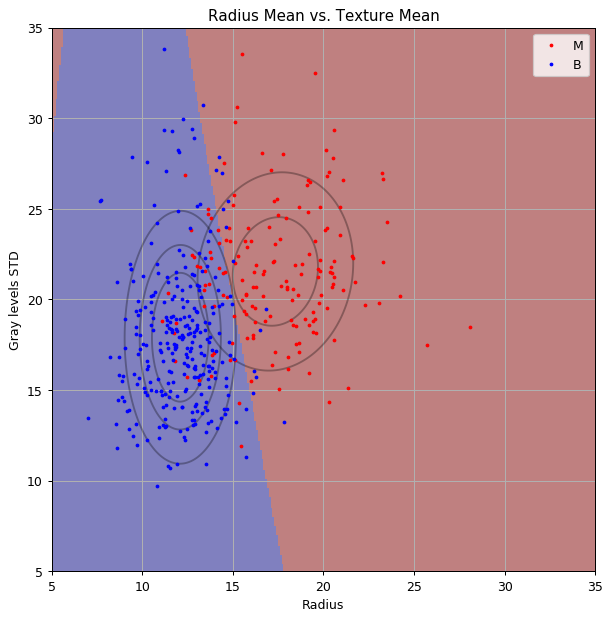

In [ ]:
norm_dist0 = multivariate_normal(clf.means_[0], clf.covariance_[0])
norm_dist1 = multivariate_normal(clf.means_[1], clf.covariance_[1])
predict = clf.predict(np.stack((x1_grid.flat, x2_grid.flat), axis=1)).reshape(x1_grid.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(x1_grid, x2_grid, norm_dist0.pdf(np.stack((x1_grid, x2_grid), axis=2)), colors='k', alpha=0.3, levels=(0.005, 0.01, 0.015))
ax.contour(x1_grid, x2_grid, norm_dist1.pdf(np.stack((x1_grid, x2_grid), axis=2)), colors='k', alpha=0.3, levels=(0.005, 0.01, 0.015))
ax.imshow(predict, extent=[x1_grid.min(), x1_grid.max(), x2_grid.max(), x2_grid.min()], cmap='jet', alpha=0.5)
ax.plot(x[y==1, 0], x[y==1, 1],'.r', markersize=4, label='M')
ax.plot(x[y==0, 0], x[y==0, 1],'.b', markersize=4, label='B')
ax.set_xlim(x1_grid.min(), x1_grid.max())
ax.set_ylim(x2_grid.min(), x2_grid.max())
ax.grid(True)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD')
ax.legend();

Also in a zoom-out plot:

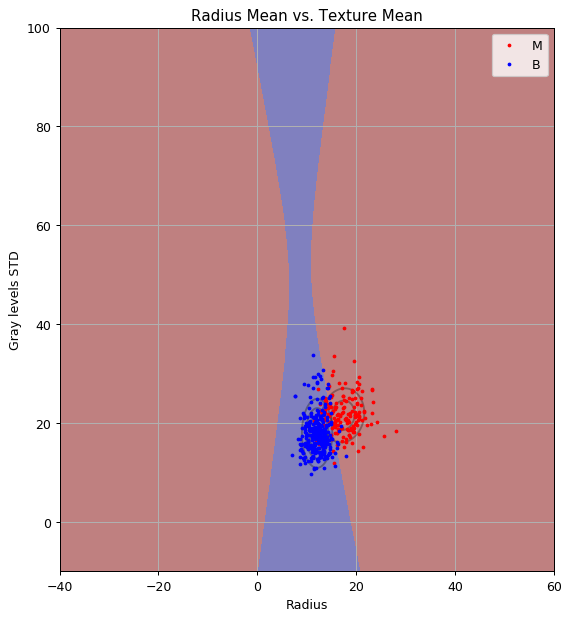

In [ ]:
x1_grid, x2_grid = np.meshgrid(np.arange(-40, 60 + 1e-9, 0.1), np.arange(-10, 100 + 1e-9, 0.1))
predict = clf.predict(np.stack((x1_grid.flat, x2_grid.flat), axis=1)).reshape(x1_grid.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(x1_grid, x2_grid, norm_dist0.pdf(np.stack((x1_grid, x2_grid), axis=2)), colors='k', alpha=0.3, levels=(0.005, 0.01, 0.015))
ax.contour(x1_grid, x2_grid, norm_dist1.pdf(np.stack((x1_grid, x2_grid), axis=2)), colors='k', alpha=0.3, levels=(0.005, 0.01, 0.015))
ax.imshow(predict, extent=[x1_grid.min(), x1_grid.max(), x2_grid.max(), x2_grid.min()], cmap='jet', alpha=0.5)
ax.plot(x[y==1, 0], x[y==1, 1],'.r', markersize=4, label='M')
ax.plot(x[y==0, 0], x[y==0, 1],'.b', markersize=4, label='B')
ax.set_xlim(x1_grid.min(), x1_grid.max())
ax.set_ylim(x2_grid.min(), x2_grid.max())
ax.grid(True)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD')
ax.legend();

As you can see we got an hyperbolic decision boundary.

## ⏱️ Performance evaluation

Let us calculate the risk on the test set

In [ ]:
## Evaluate the risk on the train set
test_prediction = clf.predict(x_test)
test_risk = (test_prediction != y_test).mean()

print_math('The test risk is: ${:.2}$'.format(test_risk))

## Using more features

### ✍️ Exercise 6.3

1. Run the QDA algorithm again but with more features. Plot the train risk and the test risk as a function of the number of features. 
2. How do you explain the fact that the test risk gets worse as we increase the number of features? How many parameters are we trying to estimate? What is the size of the train set?
3. Suggest a solution for solving this problem.

#### Solution 6.3

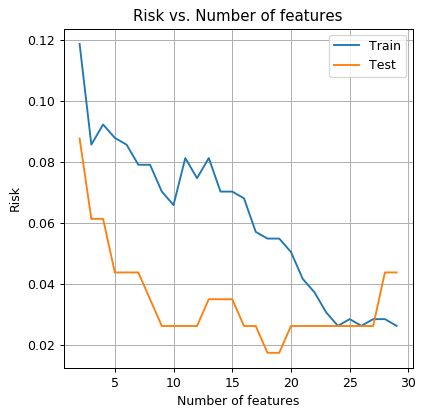

In [ ]:
features_names_list = ['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']

n_features_grid = np.arange(2, 31)
train_risk_array = np.zeros(len(n_features_grid))
test_risk_array = np.zeros(len(n_features_grid))

## Create and train the classifier object
clf = QuadraticDiscriminantAnalysis()

for i, n_features in enumerate(n_features_grid):
    x = train_set[features_names_list[:n_features]].values

    x_test = test_set[features_names_list[:n_features]].values

    clf.fit(x, y)

    ## Evaluate the risk on the train set
    train_prediction = clf.predict(x)
    train_risk_array[i] = (train_prediction != y).mean()

    ## Evaluate the risk on the test set
    test_prediction = clf.predict(x_test)
    test_risk_array[i] = (test_prediction != y_test).mean()

fig,ax = plt.subplots()
ax.plot(n_features_grid, train_risk_array, label='Train')
ax.plot(n_features_grid, test_risk_array, label='Test');
ax.set_title('Risk vs. Number of features')
ax.set_ylabel('Risk')
ax.set_xlabel('Number of features')
ax.legend();

This is a classic example of overfitting. As the model becomes more general, and the number of parameters increases, we will need more data for training it. In this case, form performing QDA with 30 features we need to estimate about $30^2$ features (mostly in the 2 covariance matrices), but the train set contains only 455 samples. 

As a rule of thumb, we would usually want the number of samples to be larger than the number of parameters in the model. Although this rule of thumb is true for most of the simple machine learning models, new examples from recent years, mainly in the field for neural networks, show great results in cases where this rule of thumb is violated.

One possible solution is to perform a dimensionality reduction using PCA. We will do so in the workshop on logistic regression.

In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->